In [3]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.utils import shuffle
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

## DATA EXPLORATION

In [4]:
# Data Loading and examination

data = pd.read_csv("C:\student-por.csv.csv")
data.head(20)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
5,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,6,12,12,13
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,13,12,13
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,4,1,4,1,1,1,2,10,13,13
8,GP,M,15,U,LE3,A,3,2,services,other,...,4,2,2,1,1,1,0,15,16,17
9,GP,M,15,U,GT3,T,3,4,other,other,...,5,5,1,1,1,5,0,12,12,13


In [5]:
# Size of the dataset

print("Number of Rows: {}\nNumber of Columns: {}".format(data.shape[0], data.shape[1]))

Number of Rows: 649
Number of Columns: 33


In [6]:
print("Number of Rows: {}\nNumber of Columns: {}".format(data.shape[0], data.shape[1]))
data.describe()

Number of Rows: 649
Number of Columns: 33


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


In [7]:
data.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

## creating a subset of the data

In [8]:
# New Dataset with only choosen columns

data2 = data[["G1", "G2", "G3", "failures", "studytime", "freetime", "absences", "internet","health"]].copy()
data2.head(649)

,G1,G2,G3,failures,studytime,freetime,absences,internet,health
0,0,11,11,0,2,3,4,no,3
1,9,11,11,0,2,3,2,yes,3
2,12,13,12,0,2,3,6,yes,3
3,14,14,14,0,3,2,0,yes,5
4,11,13,13,0,2,3,0,no,5
...,...,...,...,...,...,...,...,...,...
644,10,11,10,1,3,4,4,yes,5
645,15,15,16,0,2,3,4,yes,1
646,11,12,9,0,2,1,6,no,5
647,10,10,10,0,1,4,6,yes,2


## Exploring the data of the subset we created

In [9]:
# Columns information

print("Numerical columns:\n")

for column in data2.columns.tolist()[:-2]:
    print("-The column '{}', has values that goes from '{}' to '{}' and is '{}' type.\n"
      .format(column, data2[column].min(), data2[column].max(), data2[column].dtype))
    
print("Categorical column:\n")

print("-The column '{}' is a categorical column with values of 'yes' or 'no' and is {} type"
      .format(data2.columns.tolist()[-1], data2["internet"].dtype))

data2.describe()

Numerical columns:

-The column 'G1', has values that goes from '0' to '19' and is 'int64' type.

-The column 'G2', has values that goes from '0' to '19' and is 'int64' type.

-The column 'G3', has values that goes from '0' to '19' and is 'int64' type.

-The column 'failures', has values that goes from '0' to '3' and is 'int64' type.

-The column 'studytime', has values that goes from '1' to '4' and is 'int64' type.

-The column 'freetime', has values that goes from '1' to '5' and is 'int64' type.

-The column 'absences', has values that goes from '0' to '32' and is 'int64' type.

Categorical column:

-The column 'health' is a categorical column with values of 'yes' or 'no' and is object type


,G1,G2,G3,failures,studytime,freetime,absences,health
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,11.399076,11.570108,11.906009,0.221880,1.930663,3.180277,3.659476,3.536210
std,2.745265,2.913639,3.230656,0.593235,0.829510,1.051093,4.640759,1.446259
min,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000
25%,10.000000,10.000000,10.000000,0.000000,1.000000,3.000000,0.000000,2.000000
50%,11.000000,11.000000,12.000000,0.000000,2.000000,3.000000,2.000000,4.000000
75%,13.000000,13.000000,14.000000,0.000000,2.000000,4.000000,6.000000,5.000000
max,19.000000,19.000000,19.000000,3.000000,4.000000,5.000000,32.000000,5.000000


## Creation of model

In [10]:
#to see the relationship b/w the grades

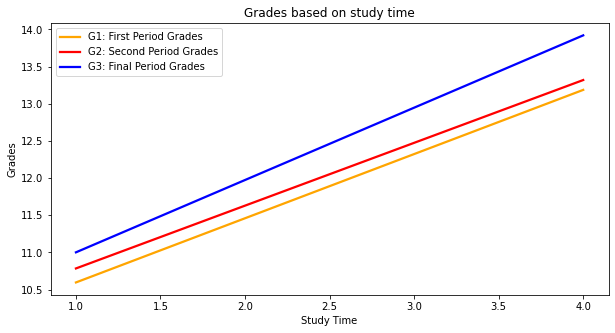

In [11]:
plt.figure(figsize=(10,5))

plt.title("Grades based on study time")
sns.regplot(x="studytime", y="G1", data=data2, color="orange",label="G1: First Period Grades", 
            scatter= False, ci= None)
sns.regplot(x="studytime", y="G2", data=data2, color="red", label="G2: Second Period Grades",
           scatter= False, ci= None)
sns.regplot(x="studytime", y="G3", data=data2, color="blue", label="G3: Final Period Grades",
            scatter= False, ci= None)
plt.xlabel("Study Time")
plt.ylabel("Grades")

plt.legend(loc="upper left")
plt.show()

## Data Pre-Processing

In [12]:
data3 = shuffle(data2.copy(), random_state=0)

In [13]:
# Predict variable (X) and target variable (Y)

X = data3["studytime"]
Y = data3["G3"]

In [12]:
# Dividing the data in training and test sets

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=0)

In [13]:
# Creating the Linear model

lm = LinearRegression()
lm.fit(X_train.values.reshape(-1, 1), Y_train) # Training the model

LinearRegression()

In [14]:
# Making predictions with the model that we builded

predictions = lm.predict(X_test.values.reshape(-1, 1)) # Predicting the target with test data
predictions[:5] # Sample of predictions

array([11.1633364 , 12.01918022, 12.01918022, 11.1633364 , 12.01918022])

In [15]:
lm_results = pd.DataFrame({
    "Study_Time": X_test,
    "G3": Y_test,
    "Predicted_G3" : predictions
})

lm_results.head()

,Study_Time,G3,Predicted_G3
19,1,12,11.163336
462,2,14,12.019180
124,2,11,12.019180
177,1,8,11.163336
215,2,12,12.019180


In [16]:
# This the result of R squared, take it like the accuracy of our model.

print("The model accuracy is: " + str(round(lm.score(X_test.values.reshape(-1, 1), Y_test)*100+10,2)) + "%")

The model accuracy is: 19.47%


In [17]:
# Calculate the Mean Absolute Error

print("The MAE of the model is:",mean_absolute_error(Y_test, predictions))

The MAE of the model is: 2.2899115416671463


In [18]:
X = data2["studytime"]
Y = data2["G3"]

# Dividing the data in training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

# Creating the Linear model
lm = LinearRegression()
lm.fit(X_train.values.reshape(-1, 1), Y_train)

# Creating predictions with the model
predictions = lm.predict(X_test.values.reshape(-1, 1)) 
predictions[:5]

# Creating the DF with the data used, the actual objective data and the predicted data
lm_results = pd.DataFrame({
    "Study_Time": X_test,
    "Grades_1": Y_test,
    "Grades_predicted" : predictions
})

print("The model accuracy is: " + str(round(lm.score(X_test.values.reshape(-1, 1), Y_test)*100,2)) + "%")
print("The MAE of the model is:",mean_absolute_error(Y_test, predictions))
lm_results.head()

The model accuracy is: 9.67%
The MAE of the model is: 1.8823476539251052


,Study_Time,Grades_1,Grades_predicted
532,2,8,11.918206
375,3,15,12.855361
306,2,16,11.918206
625,1,10,10.981052
480,1,10,10.981052


In [19]:
# To get the alfa of the model (also called intercept):

print("The alpha of the last model is:", lm.intercept_)

The alpha of the last model is: 10.043897047213012


In [20]:
# To get the beta of the model (also called coeficient):

print("The Beta of the last model is:", lm.coef_)

The Beta of the last model is: [0.93715459]


,G1,G2,G3,failures,studytime,freetime,absences,health
G1,1.000000,0.864982,0.826387,-0.384210,0.260875,-0.094497,-0.147149,-0.051647
G2,0.864982,1.000000,0.918548,-0.385782,0.240498,-0.106678,-0.124745,-0.082179
G3,0.826387,0.918548,1.000000,-0.393316,0.249789,-0.122705,-0.091379,-0.098851
failures,-0.384210,-0.385782,-0.393316,1.000000,-0.147441,0.108995,0.122779,0.035588
studytime,0.260875,0.240498,0.249789,-0.147441,1.000000,-0.068829,-0.118389,-0.056433
freetime,-0.094497,-0.106678,-0.122705,0.108995,-0.068829,1.000000,-0.018716,0.084526
absences,-0.147149,-0.124745,-0.091379,0.122779,-0.118389,-0.018716,1.000000,-0.030235
health,-0.051647,-0.082179,-0.098851,0.035588,-0.056433,0.084526,-0.030235,1.000000


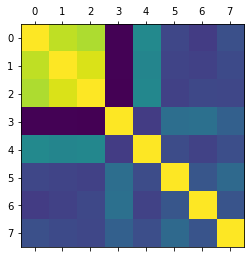

In [21]:
# Correlation between the variables:
plt.matshow(data2.corr())
data2.corr()

In [22]:
# Function to calculate VIF

def VIF(data,feature_1, feature_2, plus_feature):
    lm_n = smf.ols(formula= feature_1 + "~" + feature_2 + "+"  + plus_feature, data = data2).fit()
    rsquared_n = lm_n.rsquared
    VIF = 1/(1-rsquared_n)
    return VIF

In [23]:
# Calculate VIF for G1 by G2 and studytime

VIF(data2 ,"G1","G2", "studytime")

4.018609444902038

In [24]:
# Calculate VIF for G2 by G1 and studytime

VIF(data2 ,"G2", "G1", "studytime")

3.975032131494135

In [25]:
# Calculate VIF for studytime by G1 and G2

VIF(data2 ,"studytime", "G1", "G2")

1.074034491079331

In [26]:
# Calculate VIF for studytime by G2 and G1

VIF(data2 ,"studytime", "G2", "G1")

1.074034491079331

In [27]:
# Function to create Linear Models with Scikit-Learn

def linear_model_creator(df,feature_variables, target_variable, test_size = 0.2):
    # Algorithm
    
    # Predict variable (X) and target variable (Y)
    X = np.array(df[feature_variables])
    Y = np.array(df[target_variable])

    # Dividing the data in training and test sets
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = test_size, random_state = 0)
        
    # Creating the Linear model
    lm = LinearRegression()
    lm.fit(X_train, Y_train)

    # Creating predictions with the model
    predictions = lm.predict(X_test)

    # Creating the DF with the used features, the target variable and the predicted data
    dictionary = {}

    for feature in feature_variables:
        dictionary[feature] = X_test[:, feature_variables.index(feature)]

    lm_results = pd.DataFrame.from_dict(dictionary)
    lm_results["Y_target"] = Y_test
    lm_results["Y_predicted"] = predictions
    
    print("Target:",target_variable)
    print("Features:", feature_variables)
    print("The accuracy (R²) of the Model is:", lm.score(X_test, Y_test))
    print("The MAE of the Model is:", mean_absolute_error(Y_test, predictions))
    print("The intercept (alpha) is:", lm.intercept_)
    print("The coeficients (betas) are: ", lm.coef_)
    
    return lm_results.head()

In [28]:
# Linear Model using the most correlated features with G3 ("G1", "G2" and "studytime")

linear_model_creator(data2, ["G1", "G2", "studytime"], "G3")

Target: G3
Features: ['G1', 'G2', 'studytime']
The accuracy (R²) of the Model is: 0.8622120910268747
The MAE of the Model is: 0.7633374334655949
The intercept (alpha) is: -0.5734796611477311
The coeficients (betas) are:  [0.1490361  0.91634348 0.08643885]


,G1,G2,studytime,Y_target,Y_predicted
0,9,7,2,8,7.355127
1,14,14,3,15,14.601151
2,15,16,2,16,16.496435
3,10,10,1,10,10.166755
4,9,9,1,10,9.101375


In [29]:
# Linear Model using all the features

linear_model_creator(data2, ["G1", "G2", "studytime","freetime","failures","absences"], "G3")

Target: G3
Features: ['G1', 'G2', 'studytime', 'freetime', 'failures', 'absences']
The accuracy (R²) of the Model is: 0.8637959119068196
The MAE of the Model is: 0.7535429932702663
The intercept (alpha) is: -0.22804807205482724
The coeficients (betas) are:  [ 0.14309273  0.90338475  0.08790417 -0.05277017 -0.23678836  0.02437577]


,G1,G2,studytime,freetime,failures,absences,Y_target,Y_predicted
0,9,7,2,2,0,2,8,7.502499
1,14,14,3,3,0,0,15,14.528039
2,15,16,2,2,0,6,16,16.589022
3,10,10,1,2,0,0,10,10.219091
4,9,9,1,4,1,0,10,8.830284


In [30]:
# Linear Model using all the features except failures

linear_model_creator(data2, ["G1", "G2", "studytime","freetime","absences"], "G3")

Target: G3
Features: ['G1', 'G2', 'studytime', 'freetime', 'absences']
The accuracy (R²) of the Model is: 0.8642576086396674
The MAE of the Model is: 0.7536635779652209
The intercept (alpha) is: -0.4972864149873093
The coeficients (betas) are:  [ 0.15366661  0.91327016  0.09428168 -0.06077732  0.02214515]


,G1,G2,studytime,freetime,absences,Y_target,Y_predicted
0,9,7,2,2,2,8,7.389903
1,14,14,3,3,0,15,14.540341
2,15,16,2,2,6,16,16.619915
3,10,10,1,2,0,10,10.144808
4,9,9,1,4,0,10,8.956317


C:\Users\SANDEEP\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 19.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\SANDEEP\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 31.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


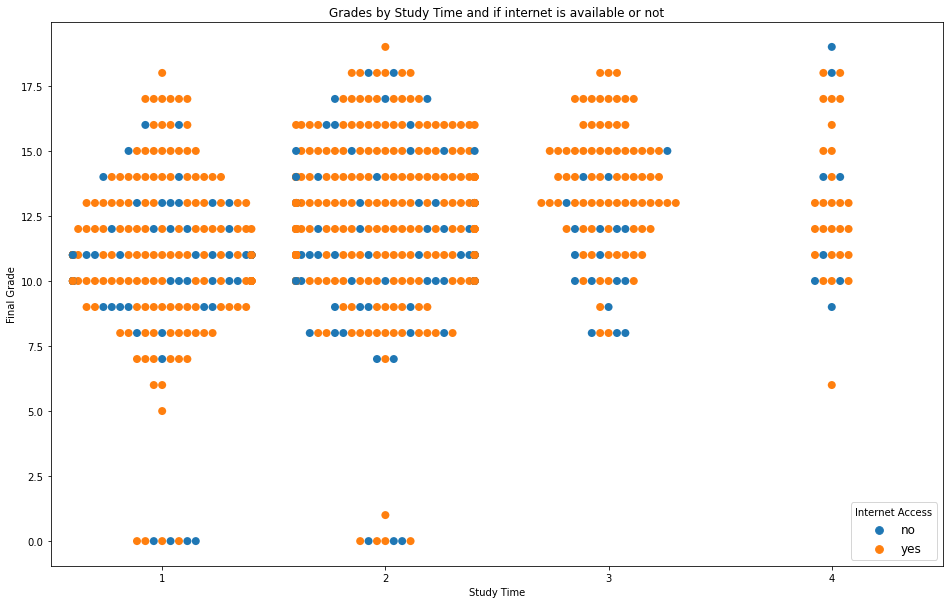

yes    498
no     151
Name: internet, dtype: int64

In [31]:
# Scatter plot to see the grades by study time and the internet access

plt.figure(figsize=(16,10))

plt.title("Grades by Study Time and if internet is available or not")
sns.swarmplot(x="studytime", y="G3", hue="internet", data=data2, size=8)
plt.xlabel("Study Time")
plt.ylabel("Final Grade")

plt.legend(loc="lower right", title="Internet Access", prop={"size":12})
plt.show()

data2.internet.value_counts()

In [32]:
# Creating the dummy variables for internet

dummy_internet = pd.get_dummies(data2["internet"], prefix = "Internet")
dummy_internet.head()

,Internet_no,Internet_yes
0,1,0
1,0,1
2,0,1
3,0,1
4,1,0


In [33]:
# Creating a DF with the dummies inside

data3 = data2.join(dummy_internet)
column_names = data3.columns.values.tolist()
data3.head()

,G1,G2,G3,failures,studytime,freetime,absences,internet,health,Internet_no,Internet_yes
0,0,11,11,0,2,3,4,no,3,1,0
1,9,11,11,0,2,3,2,yes,3,0,1
2,12,13,12,0,2,3,6,yes,3,0,1
3,14,14,14,0,3,2,0,yes,5,0,1
4,11,13,13,0,2,3,0,no,5,1,0


In [34]:
# Selecting the features from the new data frame

feature_variables = data3.drop(["G3","internet","failures"], axis= 1).columns.values.tolist()
feature_variables

['G1',
 'G2',
 'studytime',
 'freetime',
 'absences',
 'health',
 'Internet_no',
 'Internet_yes']

In [35]:
# Creates a linear model with the dummies variables

linear_model_creator(data3, feature_variables, "G3")

Target: G3
Features: ['G1', 'G2', 'studytime', 'freetime', 'absences', 'health', 'Internet_no', 'Internet_yes']
The accuracy (R²) of the Model is: 0.8652975179403557
The MAE of the Model is: 0.750058023395422
The intercept (alpha) is: -0.3441672454313096
The coeficients (betas) are:  [ 0.15458889  0.91168303  0.09226798 -0.05651485  0.02141841 -0.04175992
  0.00690545 -0.00690545]


,G1,G2,studytime,freetime,absences,health,Internet_no,Internet_yes,Y_target,Y_predicted
0,9,7,2,2,2,5,0,1,8,7.327552
1,14,14,3,3,0,2,0,1,15,14.600474
2,15,16,2,2,6,1,0,1,16,16.712946
3,10,10,1,2,0,4,0,1,10,10.123845
4,9,9,1,4,0,2,0,1,10,9.028063


In [36]:
data2.head()

,G1,G2,G3,failures,studytime,freetime,absences,internet,health
0,0,11,11,0,2,3,4,no,3
1,9,11,11,0,2,3,2,yes,3
2,12,13,12,0,2,3,6,yes,3
3,14,14,14,0,3,2,0,yes,5
4,11,13,13,0,2,3,0,no,5


In [37]:
 # Algorithm

# data2.drop("internet", inplace=True, axis=1)
# data2.head()     
    
best_features = ["G1", "G2", "studytime","freetime","absences"]
target = "G3"

# Predict variable (X) and target variable (Y)
X = np.array(data2[best_features])
Y = np.array(data2[target])

# Dividing the data in training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)
        
# Creating the Linear model
lm = LinearRegression()
lm.fit(X_train, Y_train)

# Creating predictions with the model
predictions = lm.predict(X_test)

# Creating the DF with the used features, the target variable and the predicted data
dictionary = {}

for feature in best_features:
    dictionary[feature] = X_test[:, best_features.index(feature)]

lm_results = pd.DataFrame.from_dict(dictionary)
lm_results["Y_target"] = Y_test
lm_results["Y_predicted"] = predictions
    
print("-Target:", target)
print("-Features:", best_features)
print("-The accuracy (R²) of the Model is:", lm.score(X_test, Y_test))
print("-The MAE of the Model is:", mean_absolute_error(Y_test, predictions))
print("\n-The intercept (alpha) is:", lm.intercept_)
print("-The coeficients (betas) for each feature are:\n")
[print(conjunto) for conjunto in list(zip(best_features, lm.coef_))]

lm_results.head()

-Target: G3
-Features: ['G1', 'G2', 'studytime', 'freetime', 'absences']
-The accuracy (R²) of the Model is: 0.8642576086396674
-The MAE of the Model is: 0.7536635779652209

-The intercept (alpha) is: -0.4972864149873093
-The coeficients (betas) for each feature are:

('G1', 0.1536666066916453)
('G2', 0.9132701600171489)
('studytime', 0.09428167841963961)
('freetime', -0.06077731633661796)
('absences', 0.02214515044888553)


,G1,G2,studytime,freetime,absences,Y_target,Y_predicted
0,9,7,2,2,2,8,7.389903
1,14,14,3,3,0,15,14.540341
2,15,16,2,2,6,16,16.619915
3,10,10,1,2,0,10,10.144808
4,9,9,1,4,0,10,8.956317
